In [132]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

In [133]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

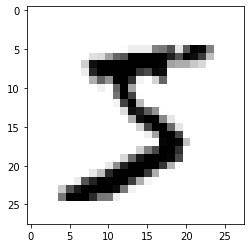

In [134]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [147]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [135]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)




1.   train data has 60000 samples
2.   test data has 10000 samples
3.   all data images are 28 * 28 pixels





In [136]:
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

reshape the image data to put all bits in a 1d array or in other words flatten


In [137]:
x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)


(50000, 784)
(10000, 784)


Normalize data to reduce variance and improve learning speed

In [139]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

hot encoding different way to make all data binary


In [140]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [141]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [142]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

Forward Pass instantiated


In [143]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256])) #randomize weight
    h1 = tf.nn.relu(tf.matmul(x, w1))
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2))
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    logits= tf.matmul(h2, w3) 
    
    return logits

In [144]:
logits = mlp(x)
lossFunction = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322

In [145]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(lossFunction)

In [146]:
# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 30
batch_size = 1000
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0
        start = 0 
        end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, lossFunction], #_, loss idc about first output give me second one
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size
            end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        print("epoch: "+str(epoch)+", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1)) #check if data is accurate with prediction
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

epoch: 0, validation accuracy: 0.1832, loss: 9277.953607177733
epoch: 1, validation accuracy: 0.7827, loss: 274.93229591369635
epoch: 2, validation accuracy: 0.8661, loss: 16.4748141670227
epoch: 3, validation accuracy: 0.8819, loss: 10.391466207504267
epoch: 4, validation accuracy: 0.8851, loss: 7.916505851745606
epoch: 5, validation accuracy: 0.8915, loss: 6.414077224731445
epoch: 6, validation accuracy: 0.8923, loss: 5.4699411725997935
epoch: 7, validation accuracy: 0.8859, loss: 5.400930657386779
epoch: 8, validation accuracy: 0.899, loss: 4.781930785179139
epoch: 9, validation accuracy: 0.9059, loss: 4.052775111198423
epoch: 10, validation accuracy: 0.9036, loss: 3.5383604049682624
epoch: 11, validation accuracy: 0.9004, loss: 3.130056934356689
epoch: 12, validation accuracy: 0.8876, loss: 5.4171368122100825
epoch: 13, validation accuracy: 0.8988, loss: 3.785394225120544
epoch: 14, validation accuracy: 0.9041, loss: 3.9673352241516113
epoch: 15, validation accuracy: 0.9047, loss: 

Videos I followed▶
1.  https://youtu.be/wQ8BIBpya2k
2.  https://youtu.be/tPYj3fFJGjk